In [21]:
import sys
sys.path.append('..')

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

LONDON_PATH = "../data/london_merged.csv"

df_london = pd.read_csv(LONDON_PATH, parse_dates=["timestamp"])
df_london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [23]:
print("Shape:", df_london.shape)
print("\nDtypes:\n", df_london.dtypes)

print("\nMissing values per column:\n", df_london.isna().sum())

Shape: (17414, 10)

Dtypes:
 timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

Missing values per column:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [24]:
df_london.describe(include="all")

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911


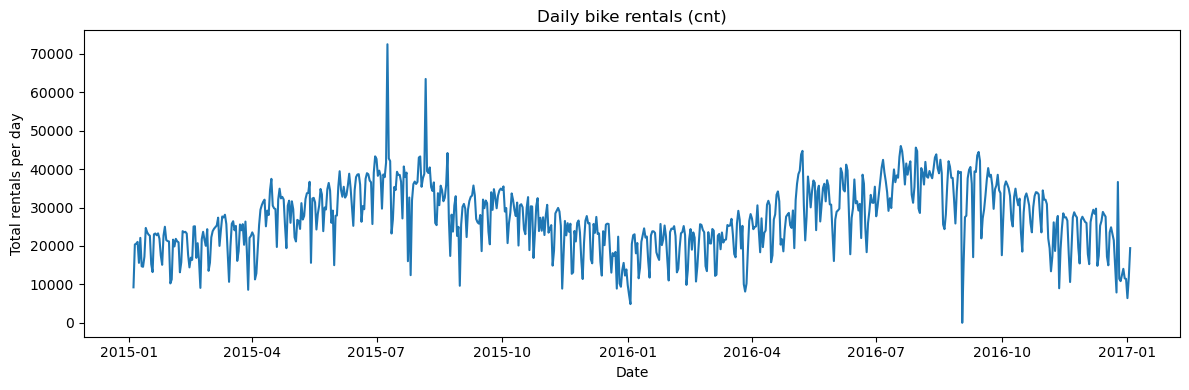

In [25]:
df_london = df_london.sort_values("timestamp")
df_london = df_london.set_index("timestamp")

# Daily total rentals
daily_cnt = df_london["cnt"].resample("D").sum()

plt.figure(figsize=(12, 4))
plt.plot(daily_cnt)
plt.title("Daily bike rentals (cnt)")
plt.xlabel("Date")
plt.ylabel("Total rentals per day")
plt.tight_layout()
plt.show()

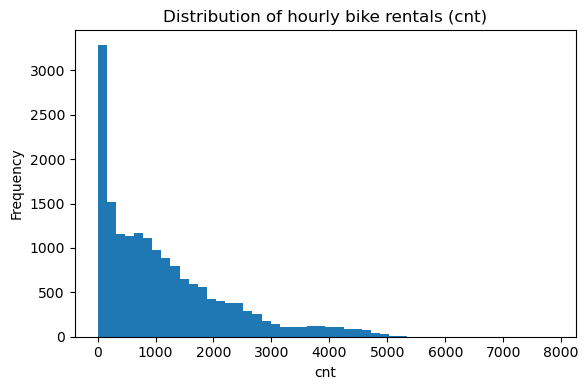

In [26]:
plt.figure(figsize=(6, 4))
plt.hist(df_london["cnt"], bins=50)
plt.title("Distribution of hourly bike rentals (cnt)")
plt.xlabel("cnt")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

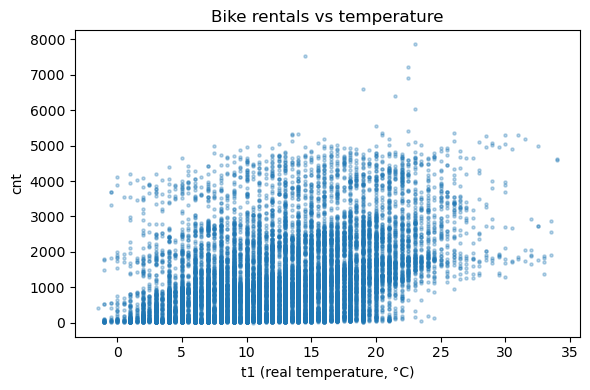

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(df_london["t1"], df_london["cnt"], s=5, alpha=0.3)
plt.title("Bike rentals vs temperature")
plt.xlabel("t1 (real temperature, °C)")
plt.ylabel("cnt")
plt.tight_layout()
plt.show()

In [28]:
df_london_reset = df_london.reset_index()

weekend_stats = df_london_reset.groupby("is_weekend")["cnt"].describe()
print(weekend_stats)

              count         mean          std  min    25%    50%      75%  \
is_weekend                                                                  
0.0         12444.0  1209.274831  1136.037077  9.0  258.0  927.0  1738.25   
1.0          4970.0   977.415694   925.205089  0.0  256.0  619.0  1458.00   

               max  
is_weekend          
0.0         7860.0  
1.0         4341.0  


<Figure size 500x400 with 0 Axes>

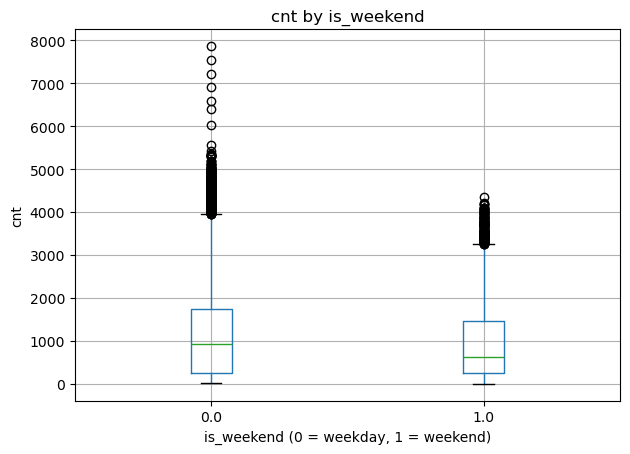

In [30]:
plt.figure(figsize=(5, 4))
df_london_reset.boxplot(column="cnt", by="is_weekend")
plt.title("cnt by is_weekend")
plt.suptitle("")
plt.xlabel("is_weekend (0 = weekday, 1 = weekend)")
plt.ylabel("cnt")
plt.tight_layout()
plt.show()

In [ ]:
)
